# Plotting time series

## 1.1 Plotting time series data
Visualizations of time series are an excellent tool to detect patterns in the data.  

If you want pandas to recognize your dataframe as a time series, parse the date column as a date. Then designate the date column as the index.

In [1]:
# load libraries
import matplotlib.pyplot as plt
import pandas as pd

#### 1.1.1 Read data with a time index

In [6]:
# load the dataframe
climate_change = pd.read_csv('climate_change.csv', parse_dates=['date'], index_col='date')
climate_change


,co2,relative_temp
date,,
1958-03-06,315.71,0.10
1958-04-06,317.45,0.01
1958-05-06,317.50,0.08
1958-06-06,NaN,-0.05
1958-07-06,315.86,0.06
...,...,...
2016-08-06,402.27,0.98
2016-09-06,401.05,0.87
2016-10-06,401.59,0.89


In [7]:
climate_change.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 706 entries, 1958-03-06 to 2016-12-06
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   co2            699 non-null    float64
 1   relative_temp  706 non-null    float64
dtypes: float64(2)
memory usage: 16.5 KB


#### 1.1.2 Plot time-series data

To plot time-series data, we use the Axes object plot command. The first argument to this method are the values for the x-axis and the second argument are the values for the y-axis.

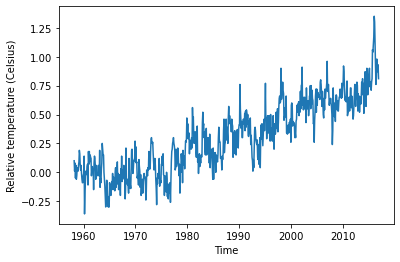

In [8]:
# create a figure and an axes with plt.subplots
fig, ax = plt.subplots()

# Add the time-series for "relative_temp" to the plot
ax.plot(climate_change.index, climate_change['relative_temp'])

# Set the x-axis label
ax.set_xlabel('Time')

# Set the y-axis label
ax.set_ylabel('Relative temperature (Celsius)')

# Show the figure
plt.show()


#### 1.1.3 Using a time index to zoom in

When a time-series is represented with a time index, we can use this index for the x-axis when plotting. We can also select a to zoom in on a particular period within the time-series using Pandas' indexing facilities.

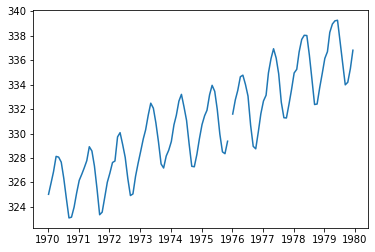

In [11]:
# Use plt.subplots to create fig and ax
fig, ax = plt.subplots()

# Create variable seventies with data from "1970-01-01" to "1979-12-31"
seventies = climate_change["1970-01-01" : "1979-12-31"]

# Add the time-series for "co2" data from seventies to the plot
ax.plot(seventies.index, seventies["co2"])

# Show the figure
plt.show()

## 1.2 Plotting time series with different variables.
#### 1.2.1 plotting two time series together

1. Using twin axes
You can plot different variables in the same subplot using two different y-axis scales.Start by adding the first variable to your axes. then use the twinx method to create a twin of this axes

ax2 = ax.twinx()

This means that the two axes share the same x axis but the y-axes are separate. Add the other variable to the second axes object and show the figure. 

2. Separate variables by color.
Encode each one with a different color. add color to the first variable ax.plot()using the color keyword argument. Also to its 

ax.set_ylabel(). 

Repeat this to the twin axes object with a different color.

3. coloring the ticks
Add color to the y-axis ticks and y-axis tick labels. This is done by adding a call to the

 ax.tick_params('y', colors = 'blue'). 
 
 This method takes either y or x as its first argument. Add it to the twin axes.










#### 1.2.3 Functions for time series data


def plot_timeseries(axes, x, y, color, xlabel, ylabel)

    axes.plot(x, y, color = color)

    axes.set_xlabel(xlabel)

    axes.set_ylabel(ylabel, color = color)
    
    axes.ticks_params('y', color = color)